In [1]:
#importation des modules nécessaires
import pandas as pd
import numpy as np

In [2]:
import sys
!{sys.executable} -m pip install seaborn

In [3]:
import seaborn as sb

In [4]:
#charger les données dans un pandas dataframe
df = pd.read_csv('titanic.csv', sep='\t', engine='python')

In [5]:
#visualiser les 10 premiéres lignes de notre dataframe 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#supprmier les colonnes Name, Ticket , Cabin qui ne sont pas numeriques
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


<AxesSubplot:>

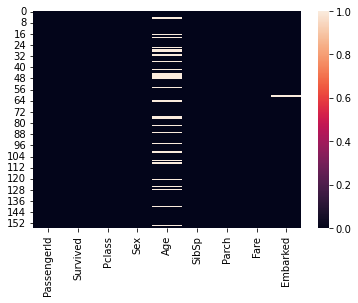

In [8]:
#afficher les informations sur notre dataset
df.info()
sb.heatmap(df.isnull())

In [9]:
#interpolation des valeurs manquantes
df['Age'] = df['Age'].interpolate()

<AxesSubplot:>

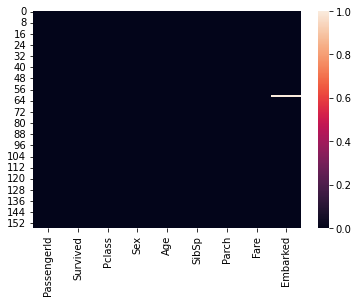

In [10]:
sb.heatmap(df.isnull())

In [11]:
#supprmier tous les lignes avec des données manquantes
df = df.dropna()

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
#convertir les données catégoriques en des données numériques
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [14]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [15]:
df = df.drop(['Sex','Embarked'],axis=1)

In [16]:
#séparation des données en X et Y
X = df.values
y = df['Survived'].values

In [17]:
X = np.delete(X,1,axis=1)

In [18]:
#séparation du données du test et donées du training 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
#Classification avec la regression logistique 
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression ()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085106382978723

In [20]:
#classification avec Gradient Boost
from sklearn import ensemble
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

In [21]:
#Tuning
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298